In [2]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display

hop_length = 256
frame_length = 1024
plt.rcParams['figure.figsize'] = (13, 5)

In [3]:
import numpy, scipy, os, matplotlib, imageio
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import scale
from scipy.spatial import distance
from scipy.interpolate import splprep, splev
from numpy import linspace


import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import scipy.signal as sg

basefile = '/home/tejaswik/Documents/CurrentProjects/melmot/'
def ups(array):
    y = sg.resample(array,600)
    y = pd.DataFrame(y)
    return(y)

def readpitch(stri):
    fil = basefile+'sound/pitch/'+stri
    z = pd.read_csv(fil, sep='   ', engine = 'python',header =0)
    return(z)

In [4]:
pitches = []
for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(ups(readpitch(strings)['F0_Hz']))

    
pitch = pd.DataFrame(pitches)
pitch.columns = ['f0']

In [5]:
def calcContEn(sound):
    fil = sound
    x, sr = librosa.load(fil)
    energy = numpy.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    rmse = librosa.feature.rmse(x)[0]
    return{'En':energy,'RMS':rmse}

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [7]:
len(b[5])
t = range(0,len(b[5]))
plt.plot(b[5],color = 'red')
e  = upsample(b[5],t)
len(e)

NameError: name 'b' is not defined

In [8]:
def upsample(arr,t):
    tckp1,u1 = splprep([t,arr],s=1.0,k=5,nest = -1)
    xnew1,ynew1 = splev(linspace(0,1,600),tckp1)
    plt.plot(ynew1)
    return ynew1

In [9]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

NameError: name 'sounds' is not defined

In [10]:
for i in a:
    print len(i)

In [15]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

In [14]:
b = []
for i in sounds:
    b.append(calcContEn(files+i)['RMS'])

In [13]:
files = basefile + 'sound/music/'
sounds = os.listdir(files)

In [16]:
for i in range(0,32):
    sounds[i] = int(sounds[i][:-4])

In [17]:
sounds = sorted(sounds)

In [18]:
for i in range(0,16):
    sounds[i] = str(sounds[i])+'.mp3'
for i in range(16,32):
    sounds[i] = str(sounds[i])+'.wav'

In [19]:
sounds

['1.mp3',
 '2.mp3',
 '3.mp3',
 '4.mp3',
 '5.mp3',
 '6.mp3',
 '7.mp3',
 '8.mp3',
 '9.mp3',
 '10.mp3',
 '11.mp3',
 '12.mp3',
 '13.mp3',
 '14.mp3',
 '15.mp3',
 '16.mp3',
 '17.wav',
 '18.wav',
 '19.wav',
 '20.wav',
 '21.wav',
 '22.wav',
 '23.wav',
 '24.wav',
 '25.wav',
 '26.wav',
 '27.wav',
 '28.wav',
 '29.wav',
 '30.wav',
 '31.wav',
 '32.wav']

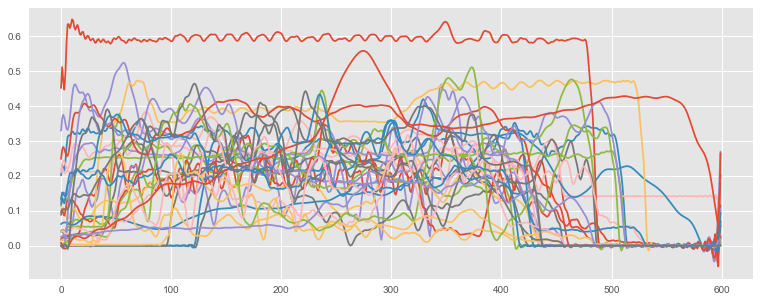

In [20]:
for i in b:
    plt.plot(ups(i))

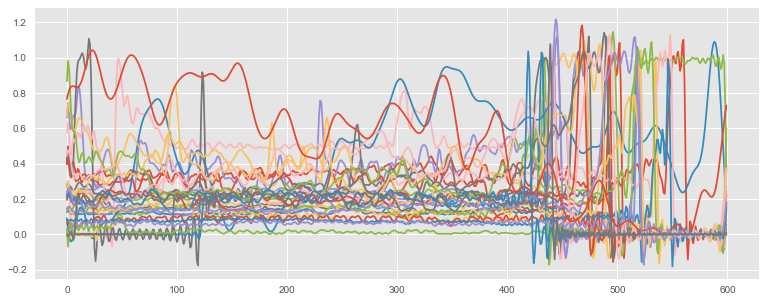

In [21]:
for i in a:
    plt.plot(ups(i))

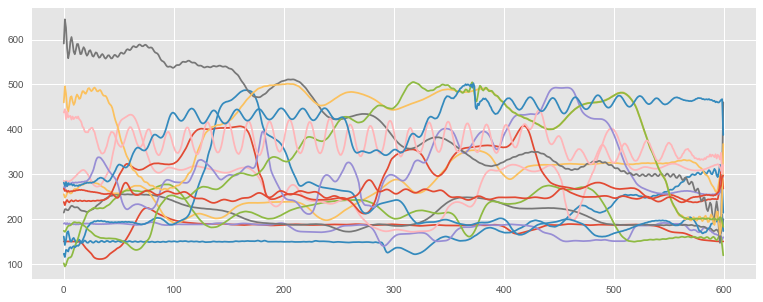

In [22]:
for i in pitches:
    plt.plot(i)

In [23]:
g = []
for i in range(0,16):
    print i
    g.append([pitches[i],ups(a[i]),ups(b[i])])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [24]:
melodies = pd.read_csv('melodies794')

In [25]:
melodies['0']

0      11
1       7
2       9
3       1
4      11
5       3
6      10
7       8
8       7
9      10
10     16
11      8
12     11
13     10
14      6
15     13
16     12
17      4
18     16
19     14
20      8
21      8
22      6
23     11
24      9
25     15
26      3
27     14
28      1
29     16
       ..
764    11
765     3
766    11
767    14
768     9
769    13
770     9
771     8
772     5
773     2
774    12
775     8
776    16
777    14
778    15
779    16
780    14
781     8
782     9
783    10
784     9
785     9
786     7
787    16
788    10
789    13
790     4
791    15
792     8
793     3
Name: 0, Length: 794, dtype: int64

In [26]:
labels = numpy.array(melodies['0'])
numpy.save('melodiesLabels',labels, allow_pickle = True)

In [27]:
o = []
for i in range(0,794):
    j = melodies['0'][i] -1
    p = pitches[j][0].values.tolist()
    sc = ups(a[j])[0].values.tolist()
    rms = ups(b[j])[0].values.tolist()
    n = [p,sc,rms]
    g = pd.DataFrame(n)
    g = numpy.array(g.T)
    o.append(g)

In [28]:
o = numpy.array(o)

In [29]:
o.shape

(794, 600, 3)

In [30]:
numpy.save('melodiesFeatures',o, allow_pickle = True)

In [48]:
o[1].shape

(600, 3)

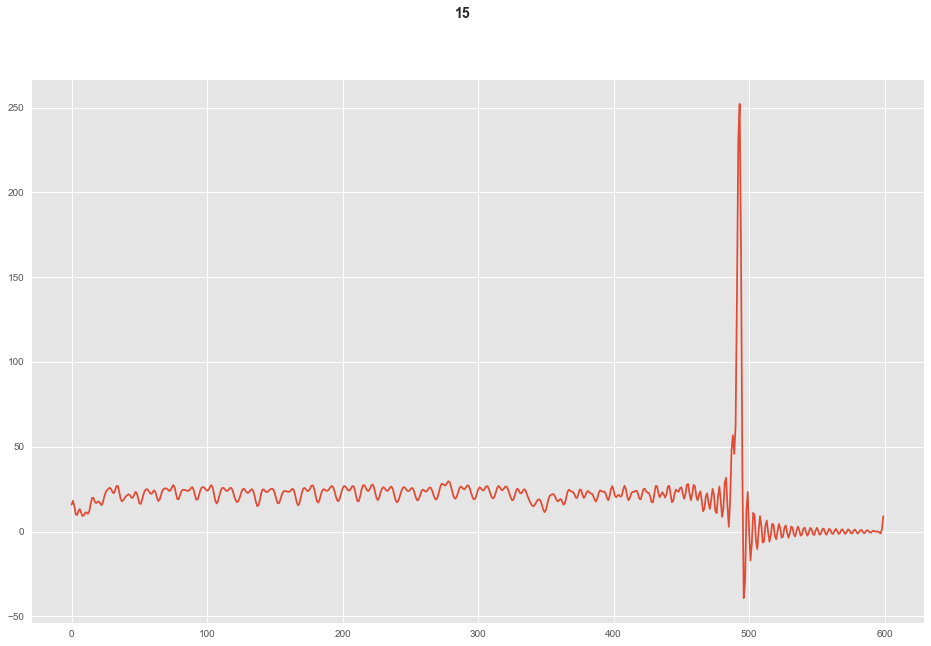

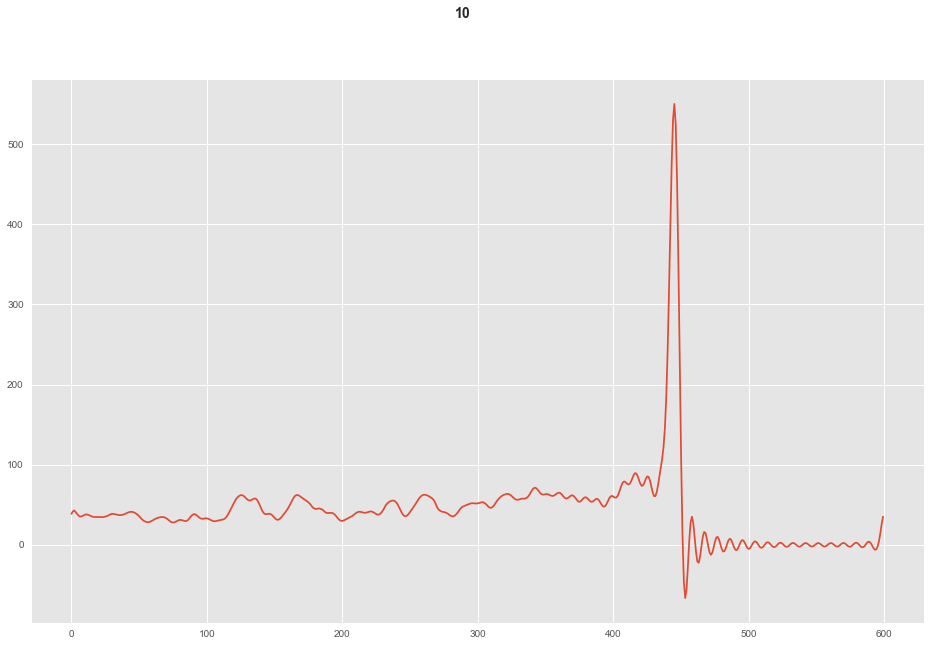

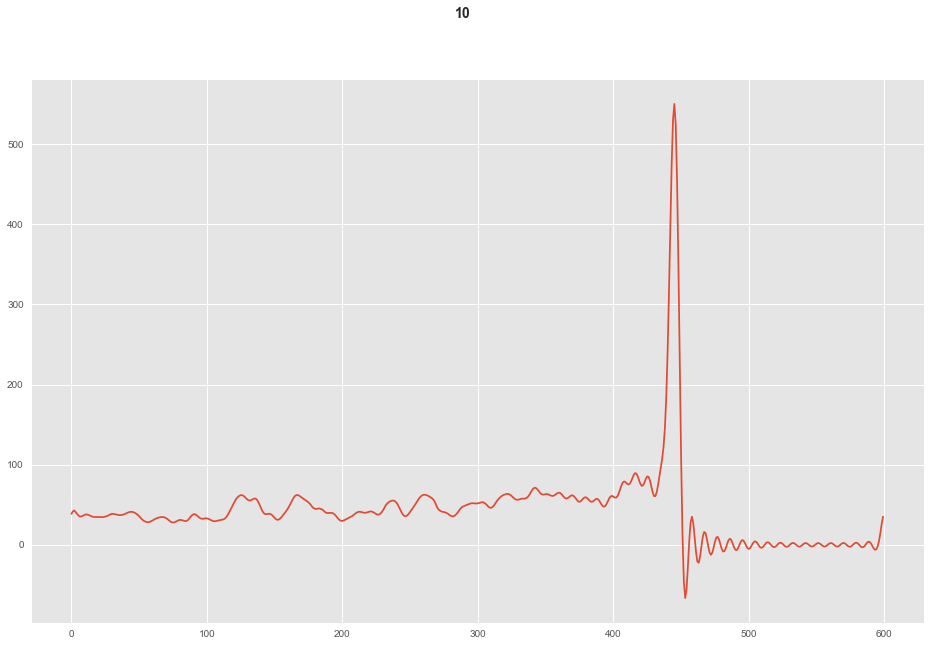

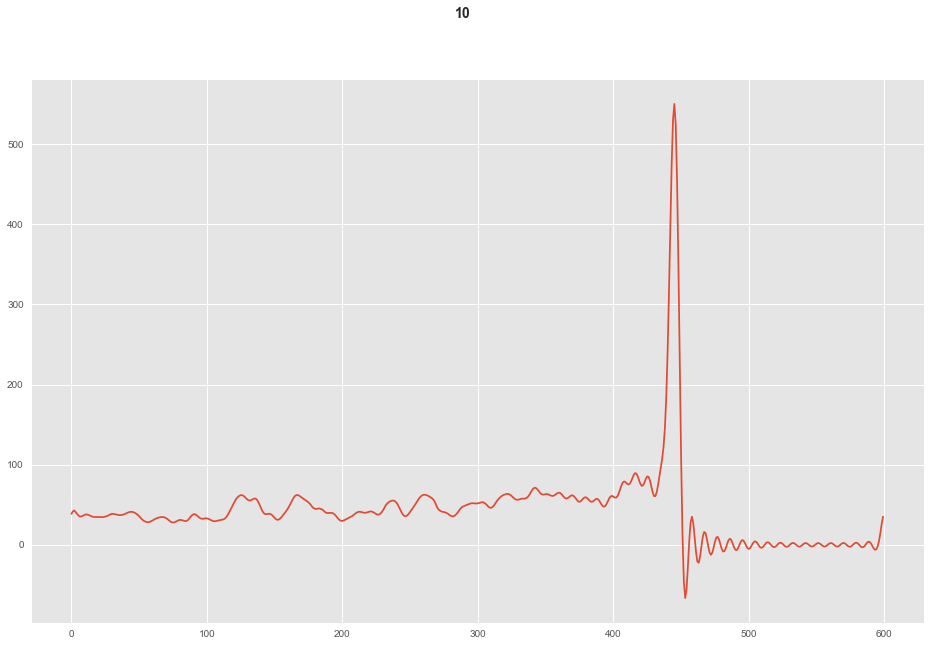

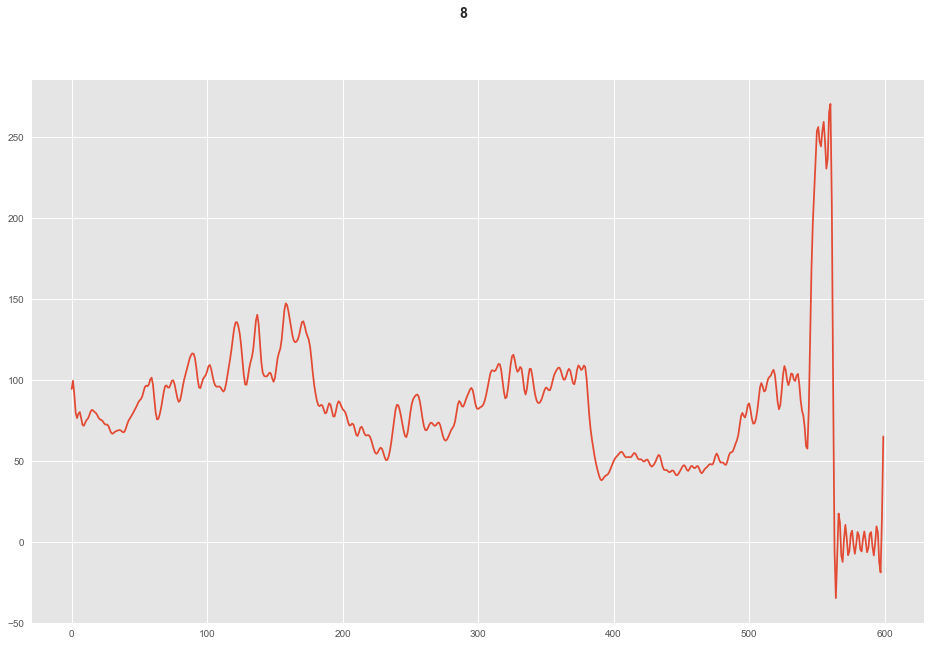

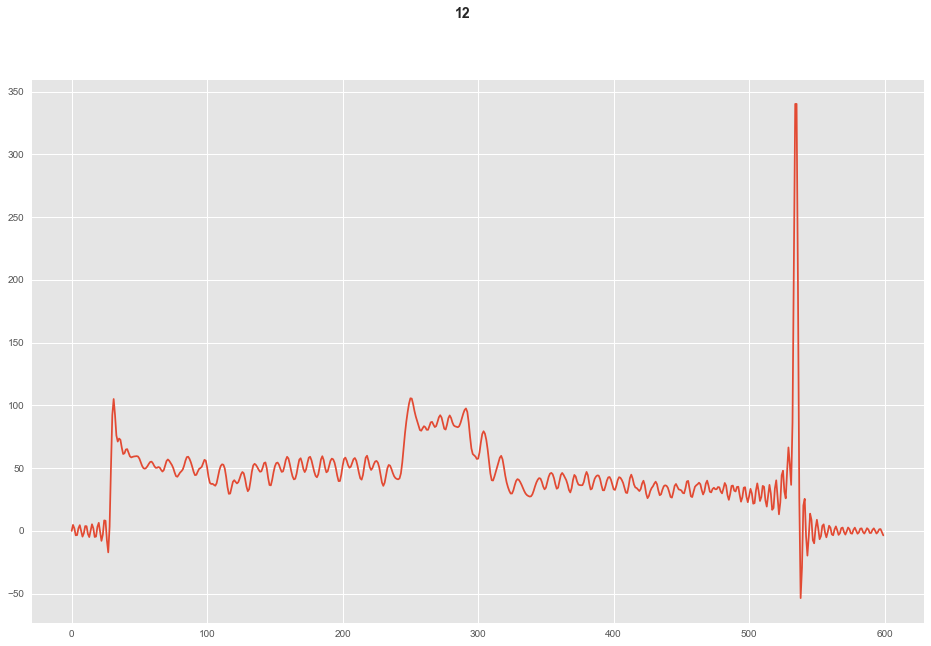

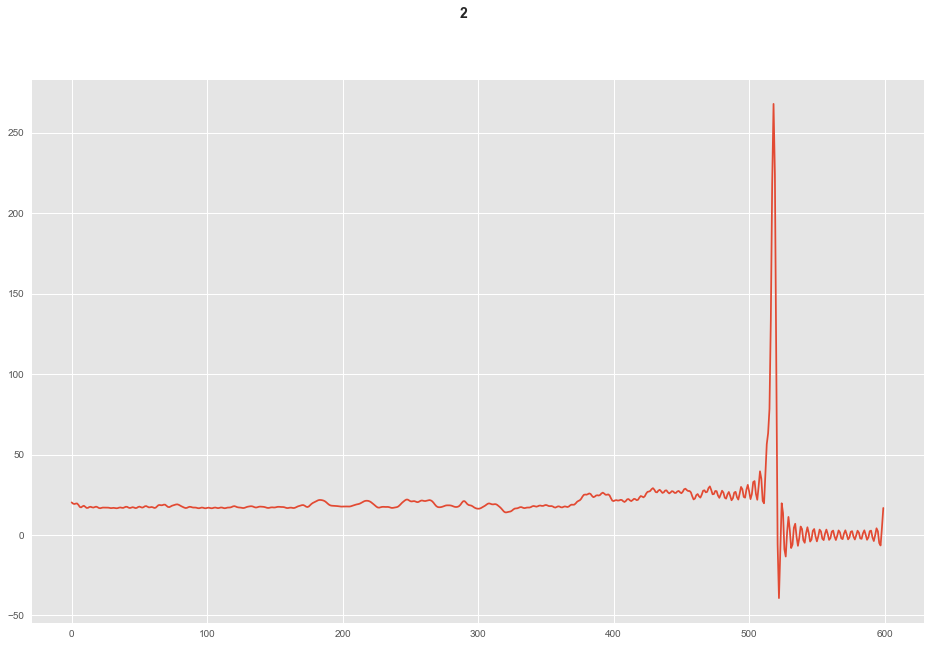

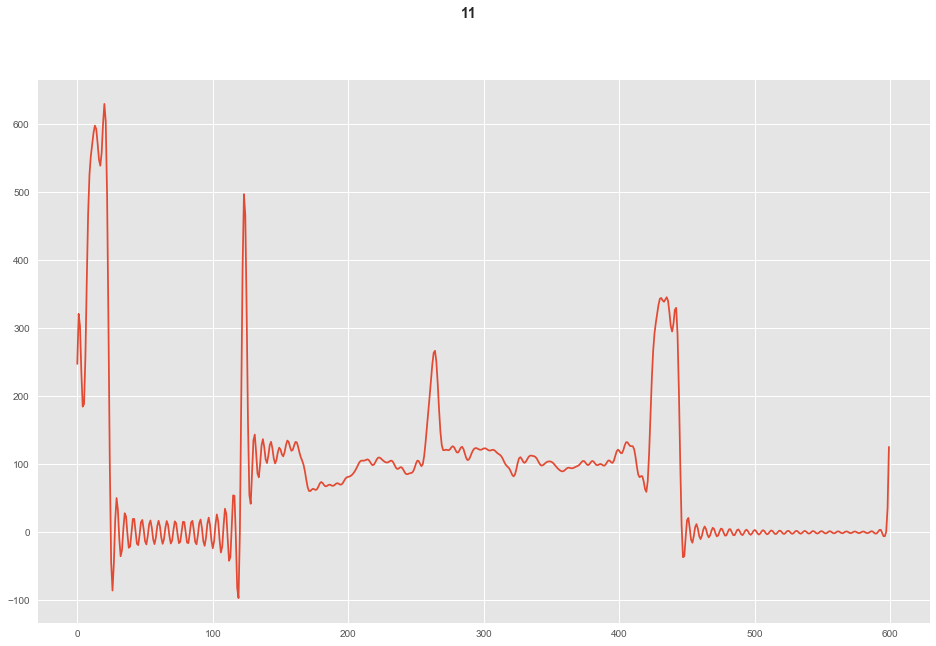

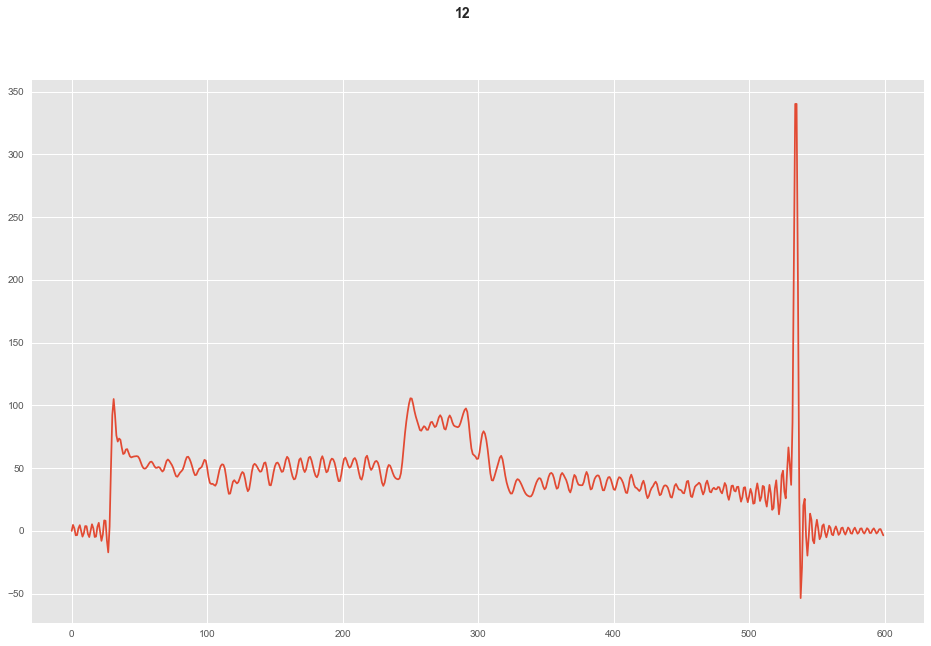

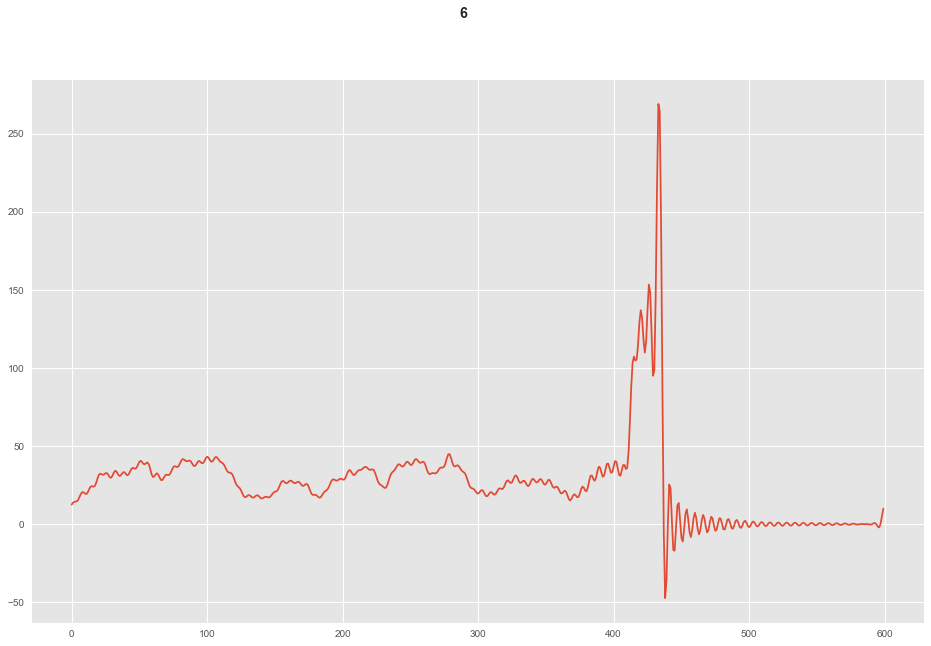

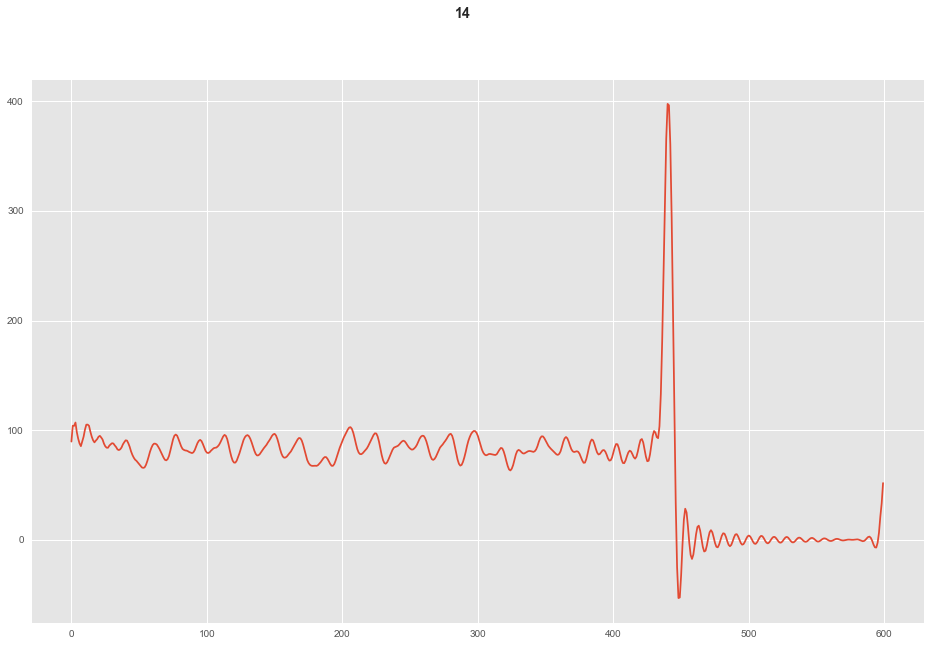

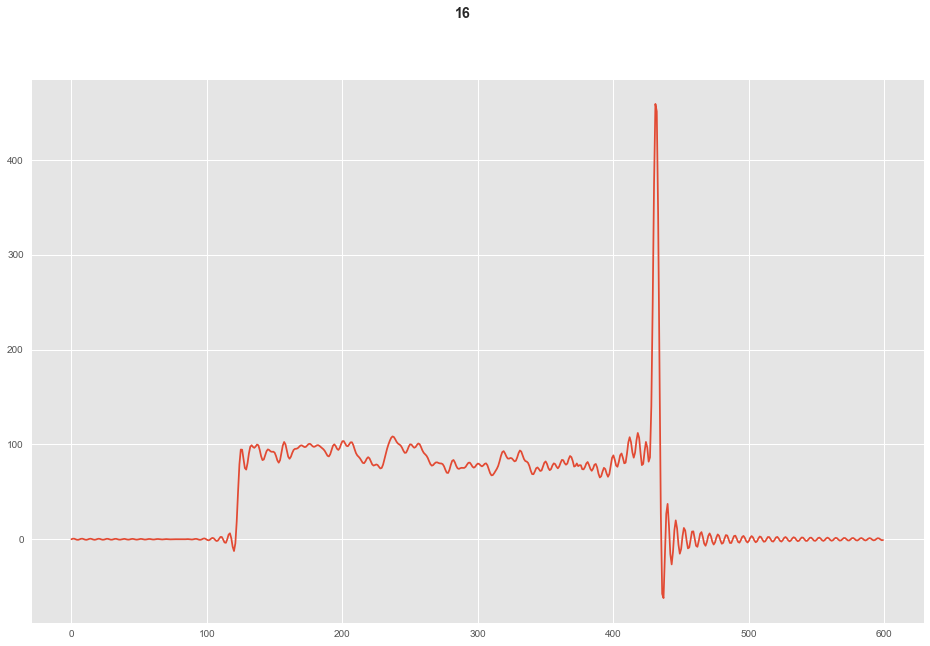

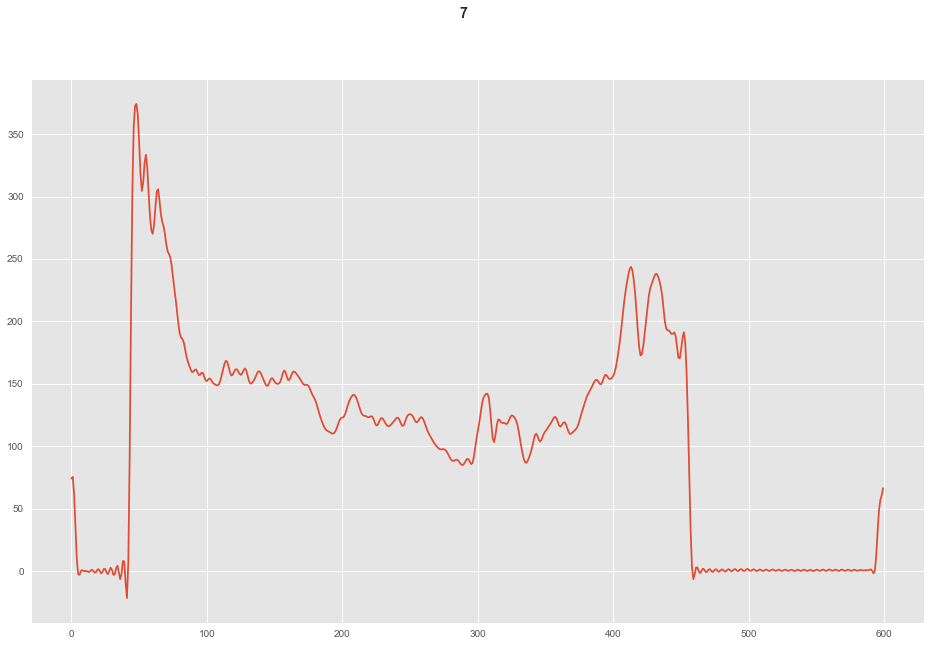

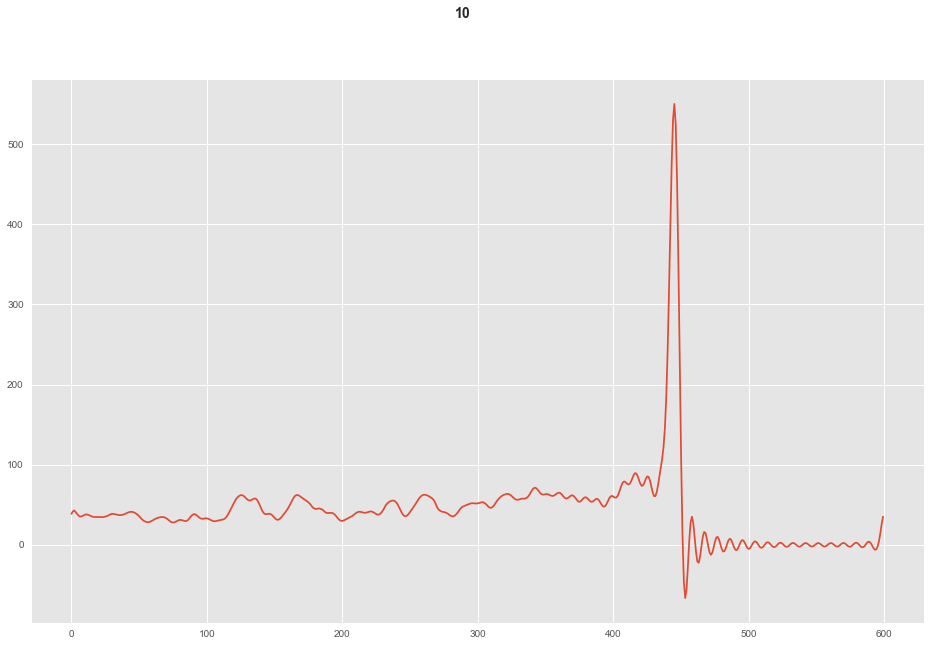

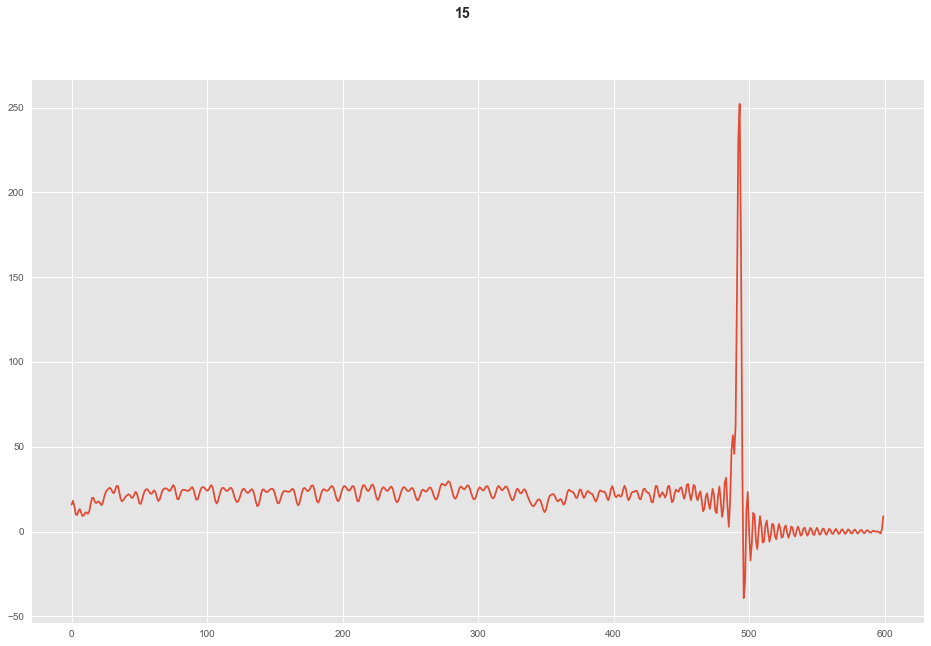

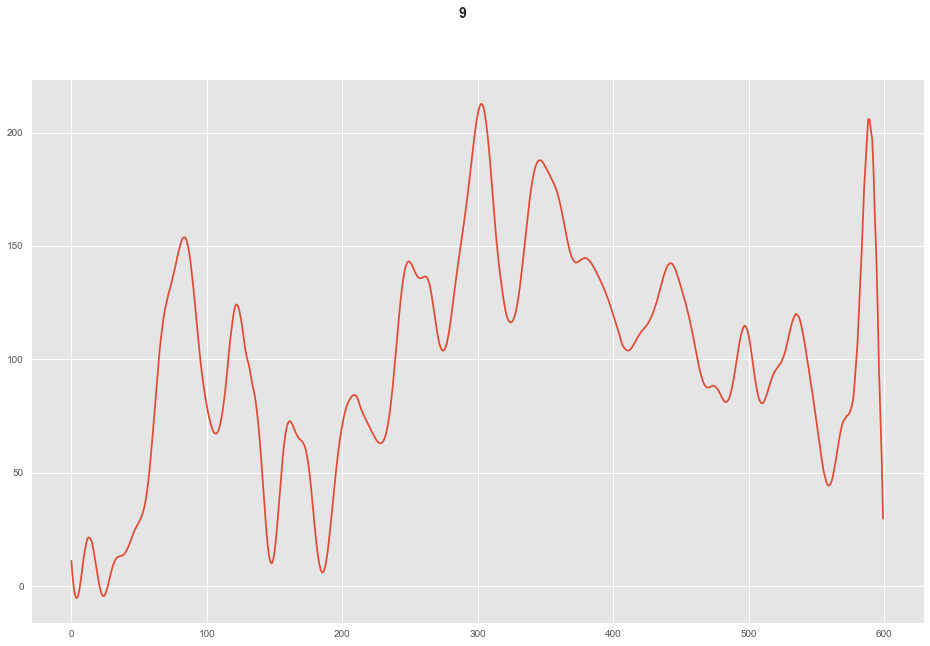

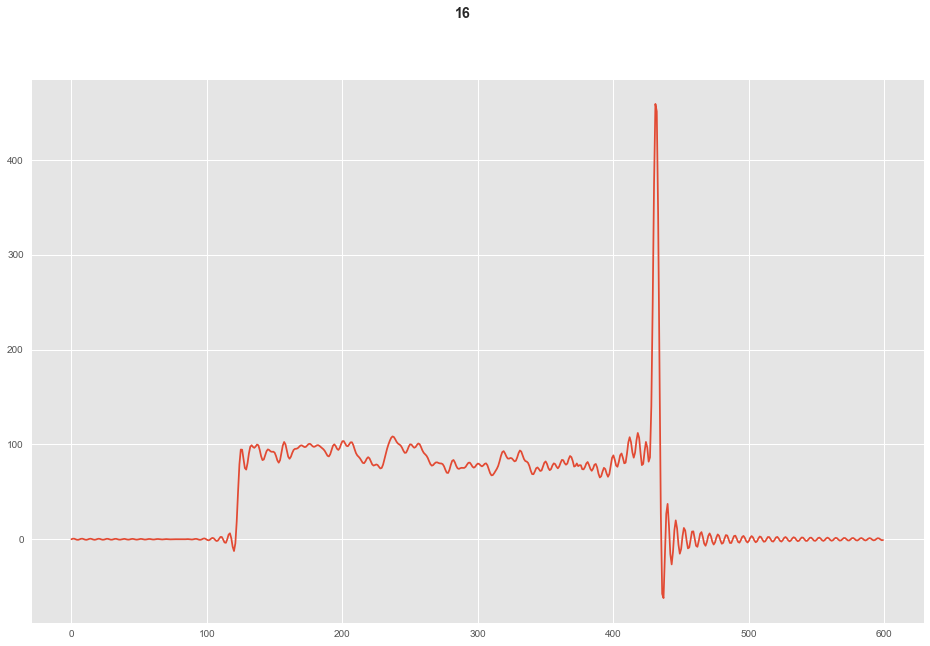

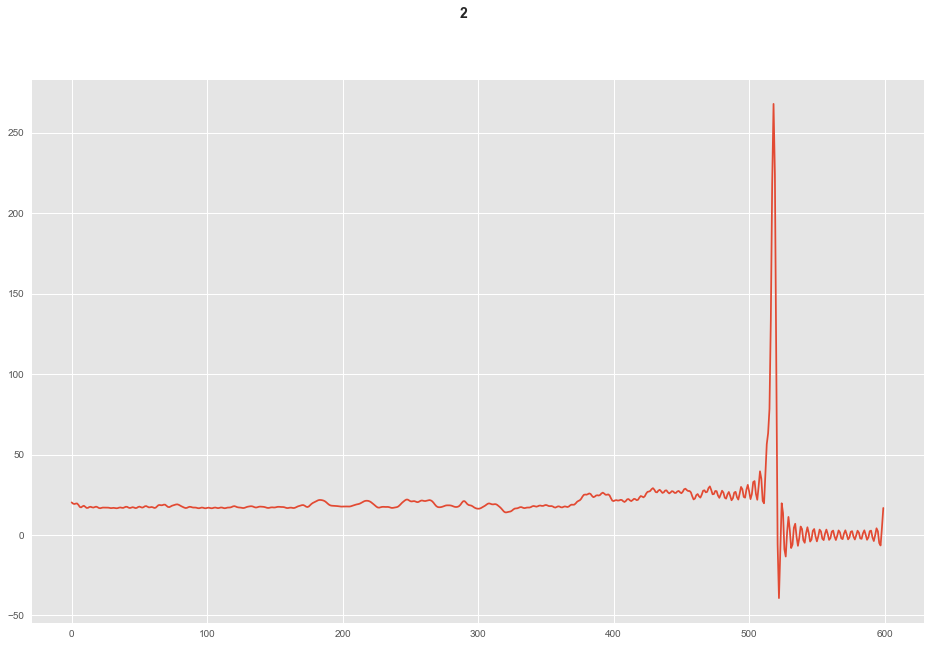

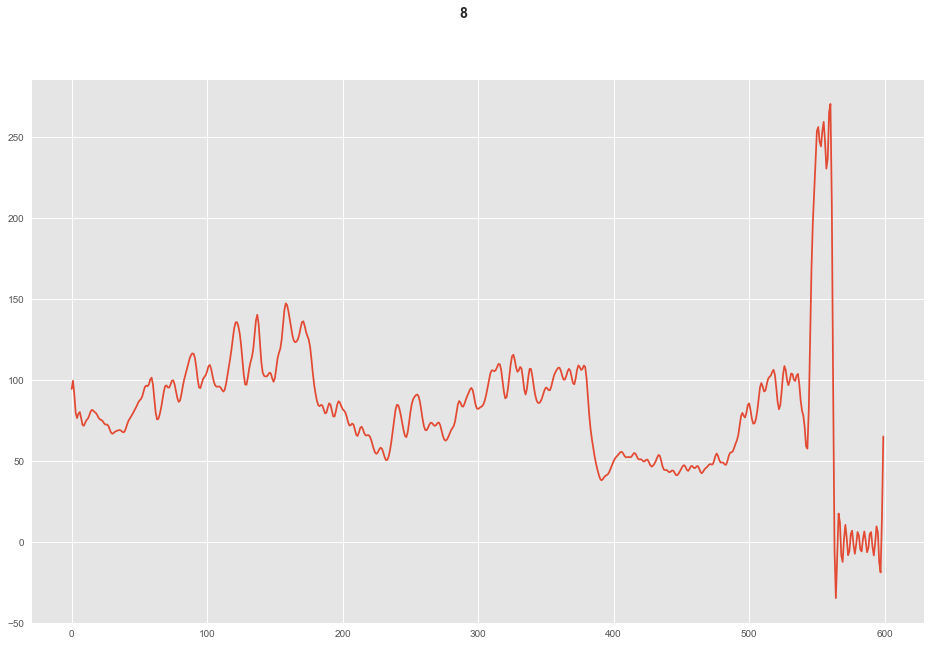

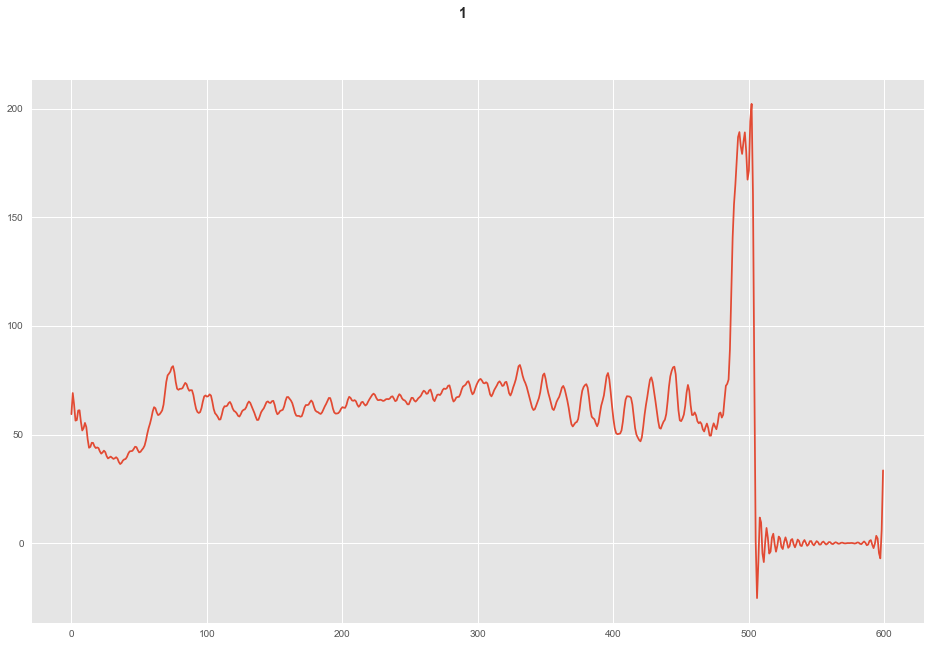

In [87]:
import random
# val = [a*b for a,b in zip(p,rms)]

for i in range(20):
    num = random.randint(1, 700)
    val = o[num,:,0]*o[num,:,1] 
    f,ax = plt.subplots(figsize = (16,10))
    ax = plt.plot(val)
    f.suptitle(melodiesLabels[num], fontsize=14, fontweight='bold')

In [306]:
pureAsc = [2, 5, 12, 13, 16]
pureDes = [11, 9]
vibrato = [13, 14, 15, 16]
motifRepeat = [3, 4, 6, 7, 8, 10, 15]
steady = [1, 14]
categoryLabels = []
for i in melodies['0']:
    if int(i) in pureAsc:
        categoryLabels.append(0)
    elif int(i) in pureDes:
        categoryLabels.append(1)
    elif int(i) in vibrato:
        categoryLabels.append(2)
    elif int(i) in motifRepeat:
        categoryLabels.append(3)
    elif int(i) in steady: 
        categoryLabels.append(4)

In [56]:
melodiesLabels = numpy.load('melodiesLabels.npy')

In [308]:
categoryLabels = numpy.array(categoryLabels)
numpy.save('categoryLabels',categoryLabels,allow_pickle=True)

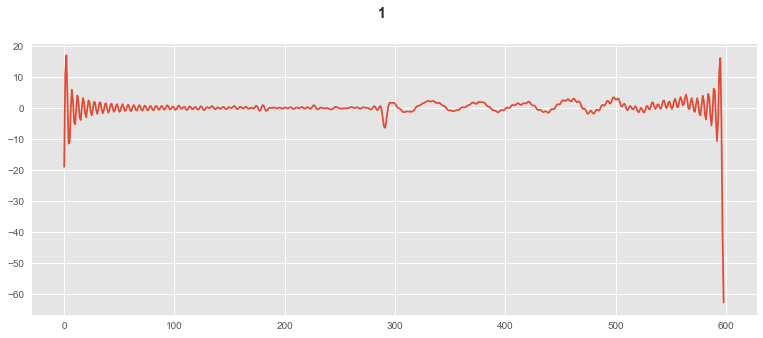

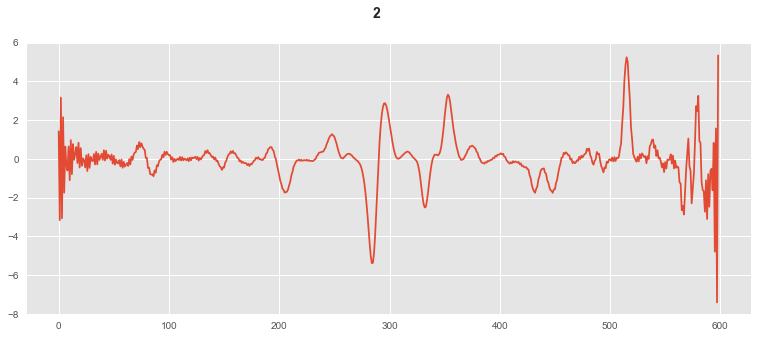

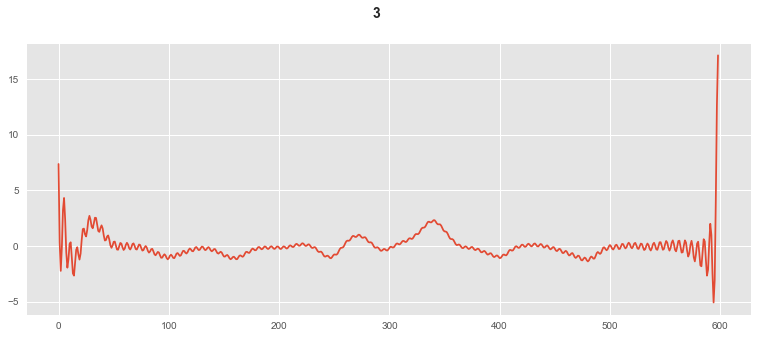

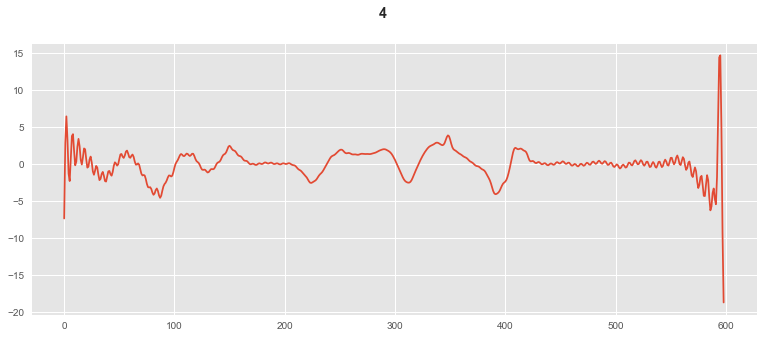

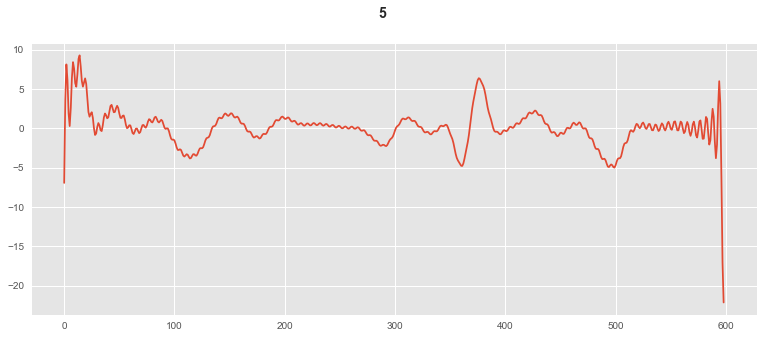

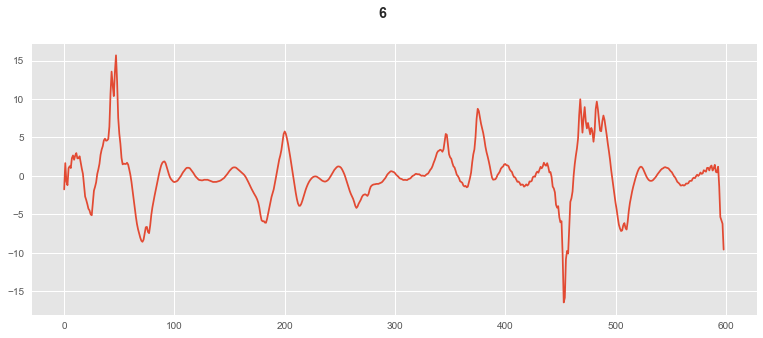

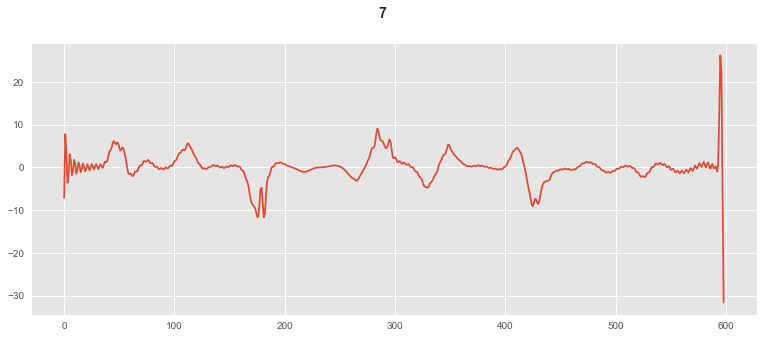

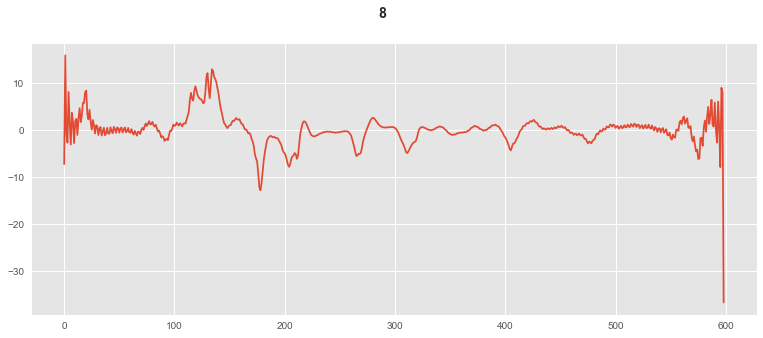

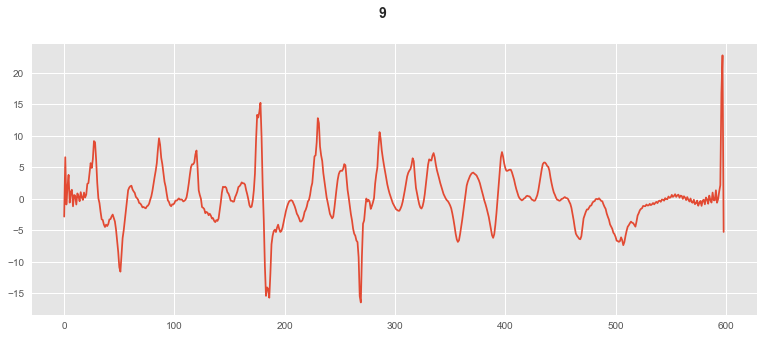

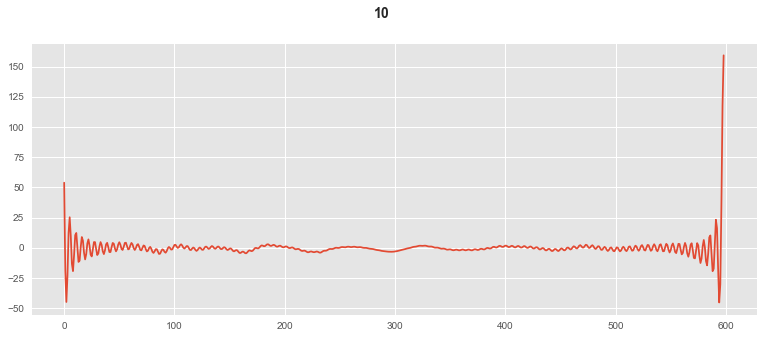

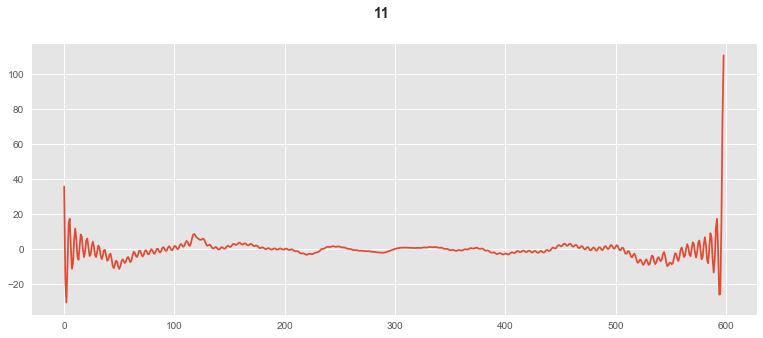

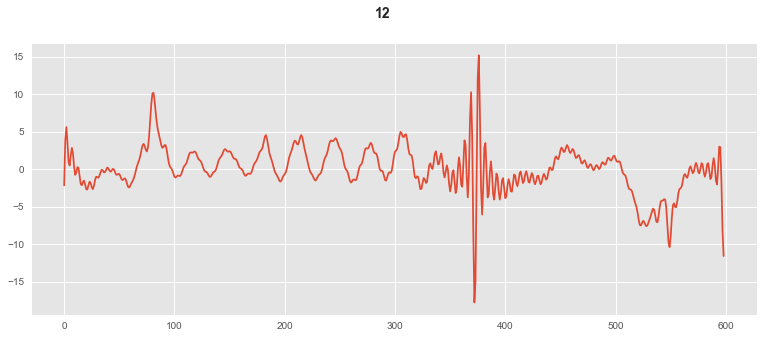

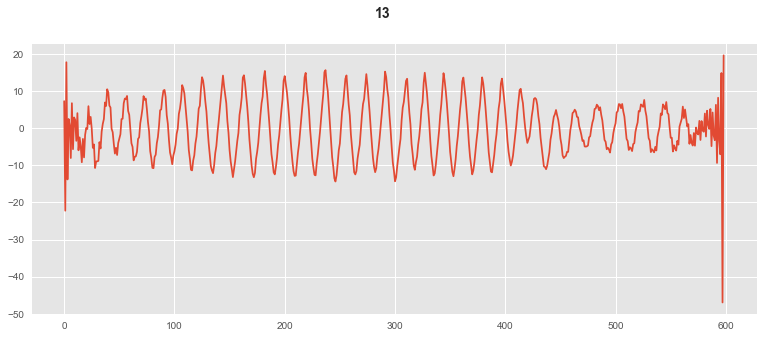

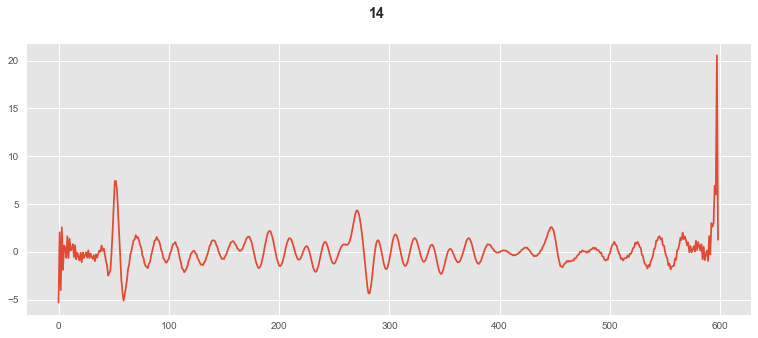

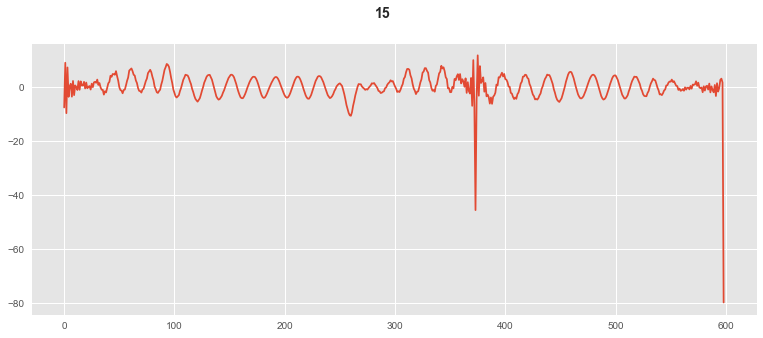

In [82]:
for i in range(1,16):
    f,a = plt.subplots()
    a = plt.plot(numpy.diff(pitches[i][0]))
    f.suptitle(i, fontsize=14, fontweight='bold')

(794, 600, 3)